In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [151]:

# reading the csv file"Predicting heart disease.csv"
read= pd.read_csv("Predicting heart disease.csv")

read.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
#removing duplicate values if any
new=read.drop_duplicates(keep='first')

In [153]:
print(read.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [154]:
#checking the datatype of all the entries
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Visualization of the data set

1    165
0    138
Name: target, dtype: int64


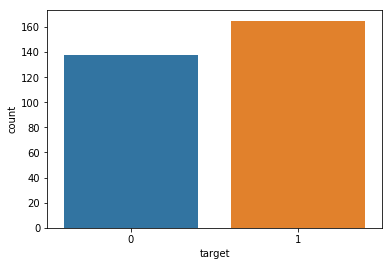

In [158]:
df=read['target']

sns.countplot(df)
d=dat.target.value_counts()
print(d)

Text(0.5, 1.0, 'Relationship between gender and diseases they are suffering from')

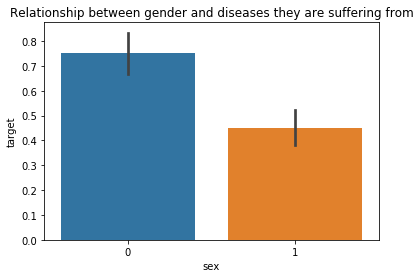

In [159]:
sns.barplot(x=read['sex'],y=read['target'])
plt.title('Relationship between gender and diseases they are suffering from')

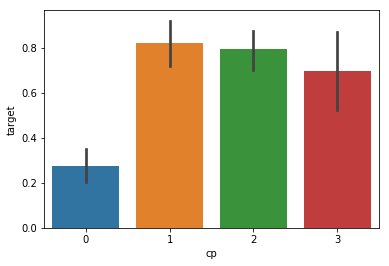

In [160]:
sns.barplot(read['cp'],y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236F0A16198>,
      dtype=object)

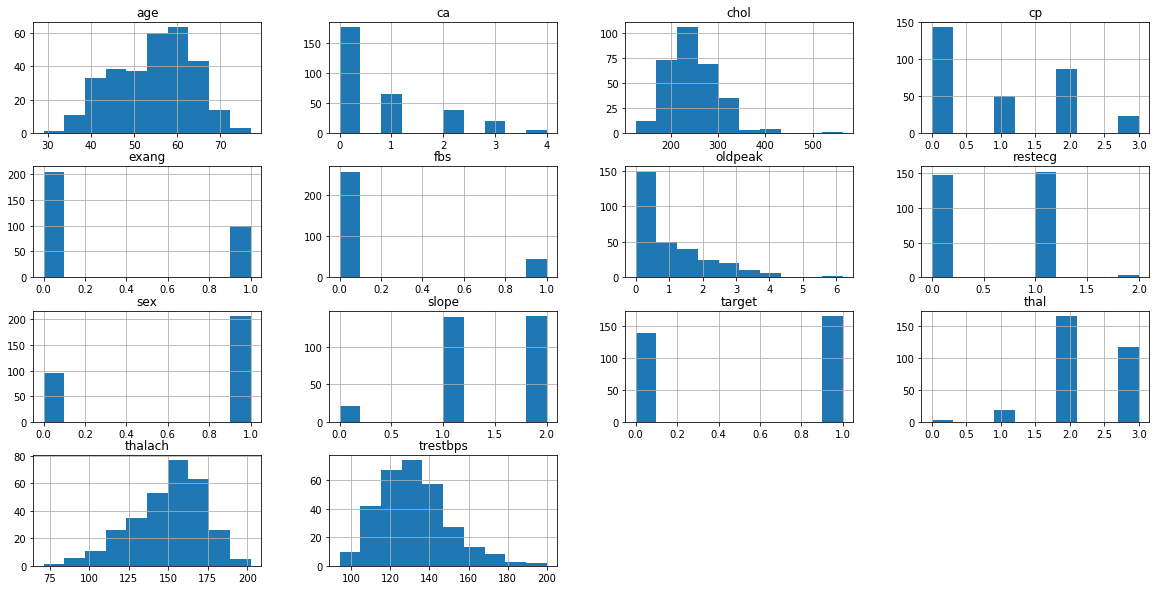

In [161]:
read.hist(figsize=(20,10))

In [162]:
category_wise = []
cont_val = []
for column in read.columns:
    if len(read[column].unique()) <= 10:
        category_wise.append(column)
    else:
        cont_val.append(column)
print(category_wise)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


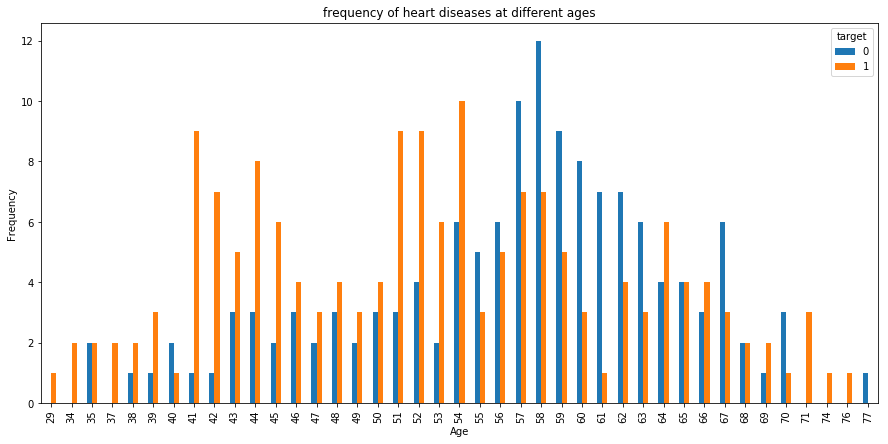

In [164]:
pd.crosstab(read.age,read.target).plot(kind="bar",figsize=(15,7))
plt.title('frequency of heart diseases at different ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

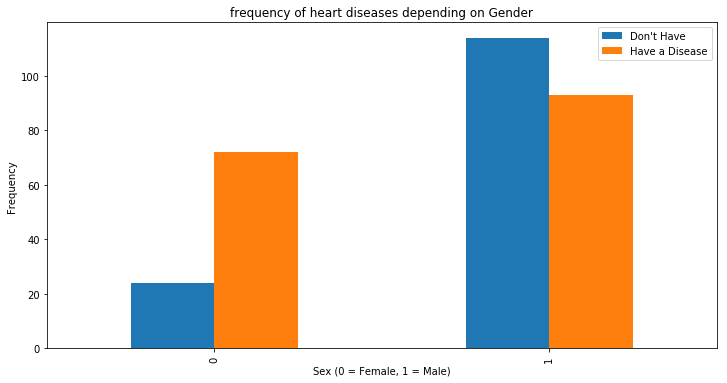

In [165]:
pd.crosstab(read.sex,read.target).plot(kind="bar",figsize=(12,6))
plt.title('frequency of heart diseases depending on Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Don't Have", "Have a Disease"])
plt.ylabel('Frequency')
plt.show()

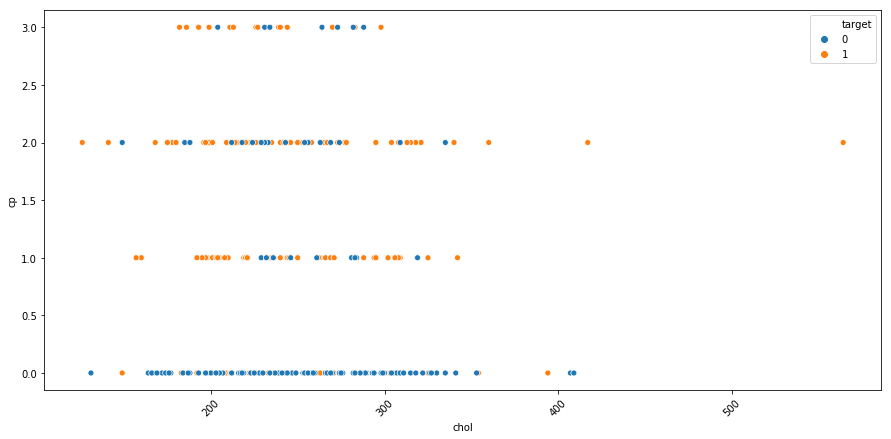

In [166]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='chol',y='cp',data=read,hue='target')
plt.xticks(rotation=45)
plt.show()

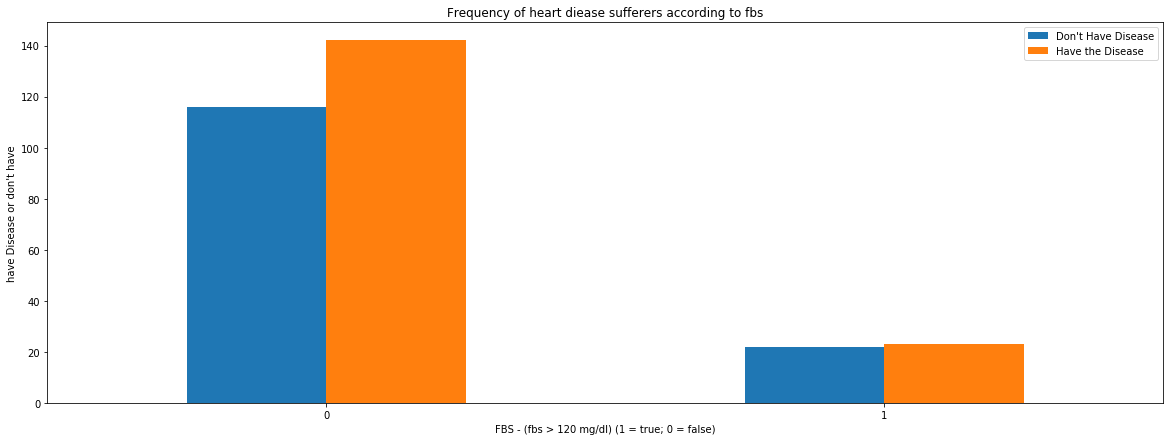

In [167]:
pd.crosstab(read.fbs,read.target).plot(kind="bar",figsize=(20,7))
plt.title('Frequency of heart diease sufferers according to fbs')
plt.xlabel('FBS - (fbs > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["Don't Have Disease", "Have the Disease"])
plt.ylabel("have Disease or don't have")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x236f12f9e48>,
 'caps': [<matplotlib.lines.Line2D at 0x236f13299b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x236f131eef0>],
 'medians': [<matplotlib.lines.Line2D at 0x236f1329dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x236f13323c8>],
 'means': []}

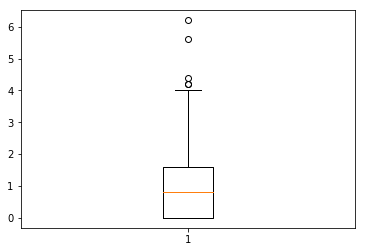

In [169]:
#boxplot for oldpeak
plt.boxplot(read['oldpeak'])

{'whiskers': [<matplotlib.lines.Line2D at 0x236f134f048>,
 'caps': [<matplotlib.lines.Line2D at 0x236f13834a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x236f137a9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x236f1383b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x236f1383e80>],
 'means': []}

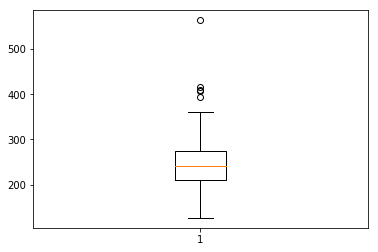

In [170]:
#boxplot for chol
plt.boxplot(read['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x236f139a240>,
 'caps': [<matplotlib.lines.Line2D at 0x236f13d92b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x236f13ce7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x236f13d9940>],
 'fliers': [<matplotlib.lines.Line2D at 0x236f13d9c88>],
 'means': []}

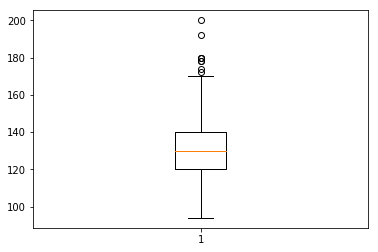

In [171]:
#boxplot for bloodpressure
plt.boxplot(read['trestbps'])

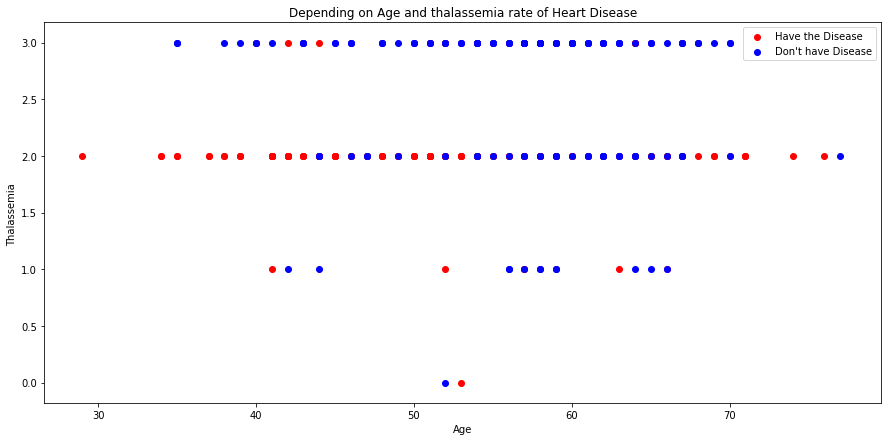

In [172]:
plt.figure(figsize=(15, 7))
plt.scatter(read.age[read.target==1],
            read.thal[read.target==1],
            c="red")
plt.scatter(read.age[read.target==0],
            read.thal[read.target==0],
            c="blue")
plt.title("Depending on Age and thalassemia rate of Heart Disease")
plt.xlabel("Age")
plt.ylabel("Thalassemia ")
plt.legend(["Have the Disease", "Don't have Disease"])

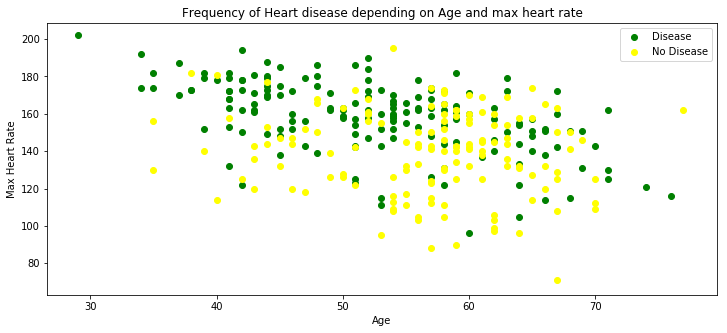

In [173]:
plt.figure(figsize=(12, 5))
plt.scatter(read.age[read.target==1],
            read.thalach[read.target==1],
            c="green")
plt.scatter(read.age[read.target==0],
            read.thalach[read.target==0],
            c="yellow")
plt.title("Frequency of Heart disease depending on Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

(14.5, -0.5)

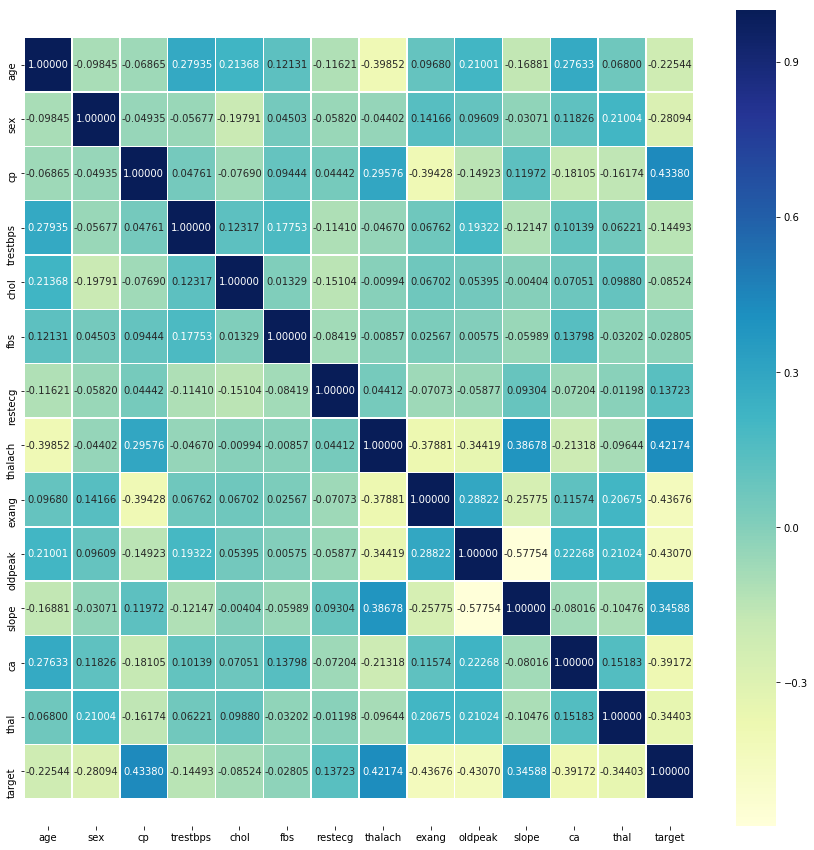

In [175]:
correlation_matrix = read.corr()
a,b = plt.subplots(figsize=(15, 15))
b= sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".5f",
                 cmap="YlGnBu")
bottom, top = b.get_ylim()
b.set_ylim(bottom + 0.5, top - 0.5)